In [2]:
# 所有用到的包
import numpy as np
import cv2
import matplotlib.pyplot as plt

# jupyter中的图片输出
def showImages(images, titles = [''], size = [1, 1], BGR = False):
    for i in range(len(images)):
        plt.subplot(size[0], size[1], i + 1)
        showImage = images[i]
        if (BGR):
            b,g,r = cv2.split(images[i])
            showImage = cv2.merge([r,g,b])
        plt.imshow(showImage ,'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

def cv_show(img):
    cv2.imshow('cv_show', img)
    cv2.waitKey(0)  # 等待时间，毫秒级，0标示按任意键终止
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # 解决mac中窗口不关闭的问题

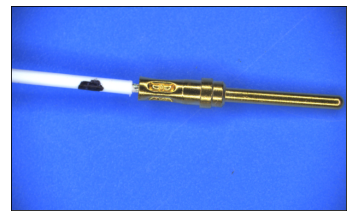

In [3]:
img = cv2.imread('/Users/zhouxinyu/Code/Python/jupyter/OpenCV/assets/images/p.png')
showImages([img], BGR = True)

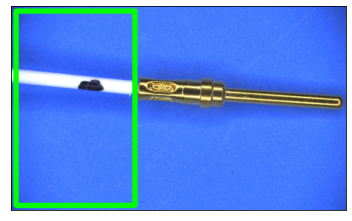

In [8]:
newImg = cv2.rectangle(
    img.copy(), (10, img.shape[0]-10), (int(img.shape[1]*0.37), 10), (0, 255, 0), 10, 4)
showImages([newImg], BGR=True)


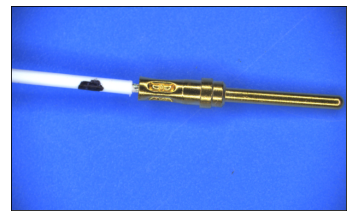

In [5]:
showImages([img], BGR=True)

In [9]:
mask = np.zeros(img.shape[:2], np.uint8) # 创建大小相同的掩模
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (10, 20, int(img.shape[1]*0.4), img.shape[0]-40) # 用于限定需要进行分割的图像范围，只有该矩形窗口内的图像部分才被处理
# 函数返回值为mask,bgdModel,fgdModel
cv2.grabCut(img, mask, rect,bgdModel,fgdModel, iterCount=1, mode=cv2.GC_INIT_WITH_RECT)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 1.59833716e-01,  3.53168536e-02,  1.97290180e-02,
          7.54289840e-01,  3.08305725e-02,  2.27180834e+02,
          9.52597907e+01,  5.50017937e+01,  1.06449940e+02,
          1.09372219e+02,  1.06596212e+02,  1.38390474e+02,
          2.12058934e+02,  2.26161733e+02,  2.54815910e+02,
          1.22373888e+02,  6.80866744e+01,  4.93833305e+01,
          6.93275357e+01,  7.62624419e+01,  3.06682994e+02,
          1.05813675e+02,  4.33494182e+01,  1.05813675e+02,
          5.24489346e+01,  2.88280010e+01,  4.33494182e+01,
          2.88280010e+01,  2.60614484e+01,  1.28307762e+03,
         -1.44831938e+02, -6.99165734e+02, -1.44831938e+02,
          2.74460671e+02,  4.14688632e+02, -6.99165734e+02,
          4.14688632e+02,  8.61725109e+02,  3.10248504

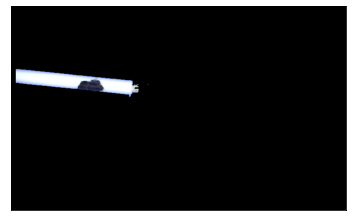

In [11]:
mask2 = np.where((mask != 3) , 0, 1)  # 0和2做背景
img_new = img * mask2[:, :, np.newaxis]  # 使用蒙板来获取前景区域
showImages([img_new], BGR=True)